# Analiza in vizulaizacija vremenskih razmer

Avtor: David Planinšek Šilc

### Uvod

V nalogi je moj namen najprej pridobiti podatke o vremenu, v nekem časovnem intervalu in lokaciji. Nato te podatke shraniti v datoteko *.csv*. Nato pa jih analizirati ter vizualizirati.
Podatki vključujejo datum, temperatura tega dne, seštevek dnevnih padavin, padavine v urah in sončne radijacije.

### Pridobitev podatkov

In [1]:
import podatki
import pandas as pd

Izberemo si časovni interval

In [2]:
zac = "1990-01-01"
konec = "2020-12-31"

Izberemo si še koordinate na katerih nas zanima vreme

In [3]:
sirina = 46.0833
dolzina = 15.0

Sedaj pridobimo podatke iz strežnika. Pri tem dobimo odgovor s pomočjo knjižnice *requests*. Podatke spravimo v format JSON, nato pa jih prevedemo v pandas DataFrame za lazjo obdelavo. 
Nato prevedemo vse stolpce in zatem vrnemo DataFrame.
Spodaj izpišemo naše željene podatke.

In [4]:
df = podatki.pridobi_uredi(sirina, dolzina, zac, konec)
df

,datum,temperatura,dež_sum,dež_ure,radijacija
0,1990-01-01,-2.0,0.0,0.0,3.03
1,1990-01-02,-0.4,0.0,0.0,4.71
2,1990-01-03,-0.7,0.0,0.0,4.02
3,1990-01-04,-1.7,0.0,0.0,4.51
4,1990-01-05,-1.6,0.0,0.0,5.75
...,...,...,...,...,...
11318,2020-12-27,-0.4,0.0,0.0,4.20
11319,2020-12-28,3.2,21.0,17.0,2.34
11320,2020-12-29,5.0,14.0,18.0,2.32
11321,2020-12-30,5.3,5.6,11.0,3.56


Uporabimo knjižnico pandas za opis podatkov s katerimi delamo

In [5]:
df.describe()

,temperatura,dež_sum,dež_ure,radijacija
count,11323.000000,11323.000000,11323.000000,11323.000000
mean,12.754782,3.095770,5.038771,12.686653
std,8.347892,6.584821,6.795873,7.711974
min,-12.400000,0.000000,0.000000,0.330000
25%,6.200000,0.000000,0.000000,5.760000
50%,13.100000,0.100000,1.000000,11.700000
75%,19.400000,2.900000,9.000000,19.530000
max,34.100000,70.800000,24.000000,29.390000


Shranimo tabelo v datkoteko *podatki.csv*

In [6]:
podatki.shrani_tabelo(df, "podatki")

### Analiza

Najprej vpeljemo vse knjižnice, ki jih bomo potrebovali.

In [7]:
import analiza
import matplotlib.pyplot as plt
import seaborn as sns

Preberemo tabelo iz datoteke, ki smo jo prej ustvarili. In ustvarimo novo tabelo povprečij mesecev. Na koncu še izpišemo to tabelo

In [8]:
df = pd.read_csv("podatki.csv")
mesecno_povprecje = analiza.groupiranje_meseci(df)
mesecno_povprecje

,mesec,temperatura,dež_sum,dež_ure,radijacija
0,1,2.408949,1.080333,4.276795,4.716566
1,2,4.284018,1.408904,4.800228,7.932489
2,3,8.478564,1.815609,4.809573,12.246316
3,4,12.727312,3.048172,5.893548,16.592430
4,5,16.995317,3.936212,5.926119,19.522175
5,6,20.813226,4.171935,5.296774,21.299333
6,7,22.899896,3.679084,4.190427,21.447378
7,8,22.840999,4.037357,4.264308,18.614381
8,9,17.653656,4.537419,5.221505,12.942656
9,10,13.061707,4.057440,4.968783,8.116826


Predstavitev mesečnih povprečij.

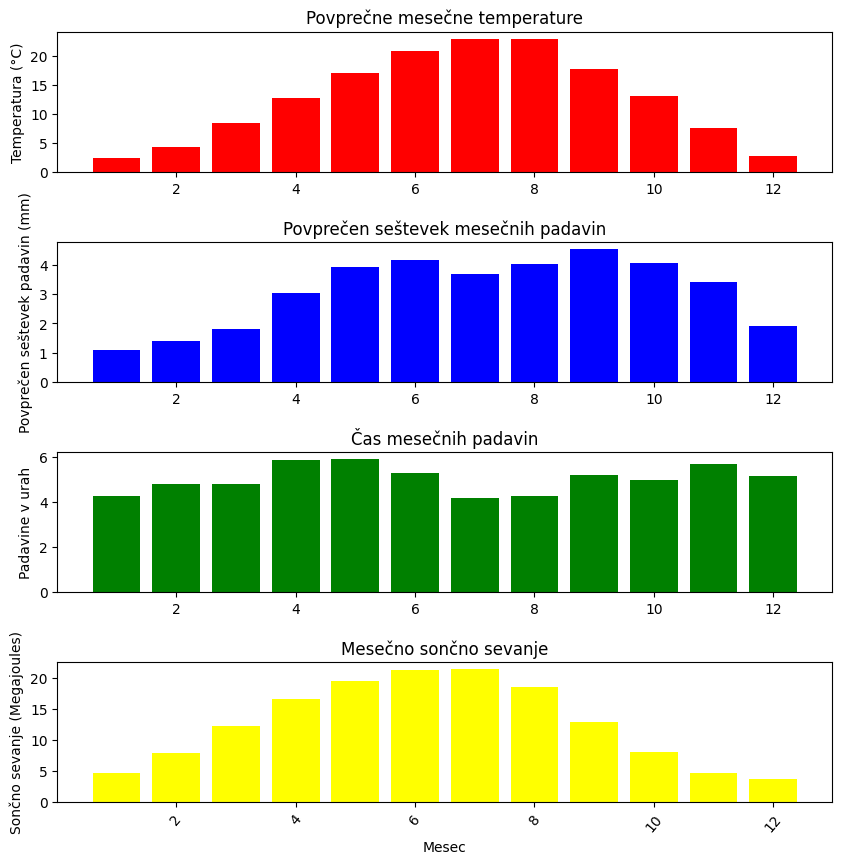

In [9]:
analiza.grafi_mesecnih_povprecij(mesecno_povprecje)

Iz grafov lahko razberemo, da so povprečne mesečne temperature v vseh letih najvišje poleti, najnižje pa pozimi. Lahko tudi opazimo, da je povprečen seštevek mesečnih padavin najvišji jeseni. Čas mesečnih padavin skozi leta, pa je pravzaprav precej razporejen skozi leto.
Največ sončnega sevanja je seveda poleti, praktično 5x več kot pa pozimi.

Predstavitev letnih povprečij, najprej ustvarimo novo tabelo, kjer so zbrana letna povprečja, zatem pa tabelo prikažemo z grafom.

In [12]:
letno_povprecje = analiza.groupiranje_leto(df)
letno_povprecje

,leto,temperatura,dež_sum,dež_ure,radijacija
0,1990,12.820000,3.211233,4.778082,12.785288
1,1991,11.614795,2.614795,4.715068,12.439288
2,1992,13.140710,2.950546,4.341530,12.858634
3,1993,12.332877,3.022740,4.715068,12.766986
4,1994,13.413973,2.827671,4.471233,12.925562
5,1995,12.076438,3.237808,5.213699,12.347808
6,1996,10.509290,2.979235,7.357923,11.855929
7,1997,12.141370,2.708493,4.556164,12.939260
8,1998,12.440548,3.202740,4.720548,12.756603
9,1999,12.144110,3.101918,5.254795,12.320575


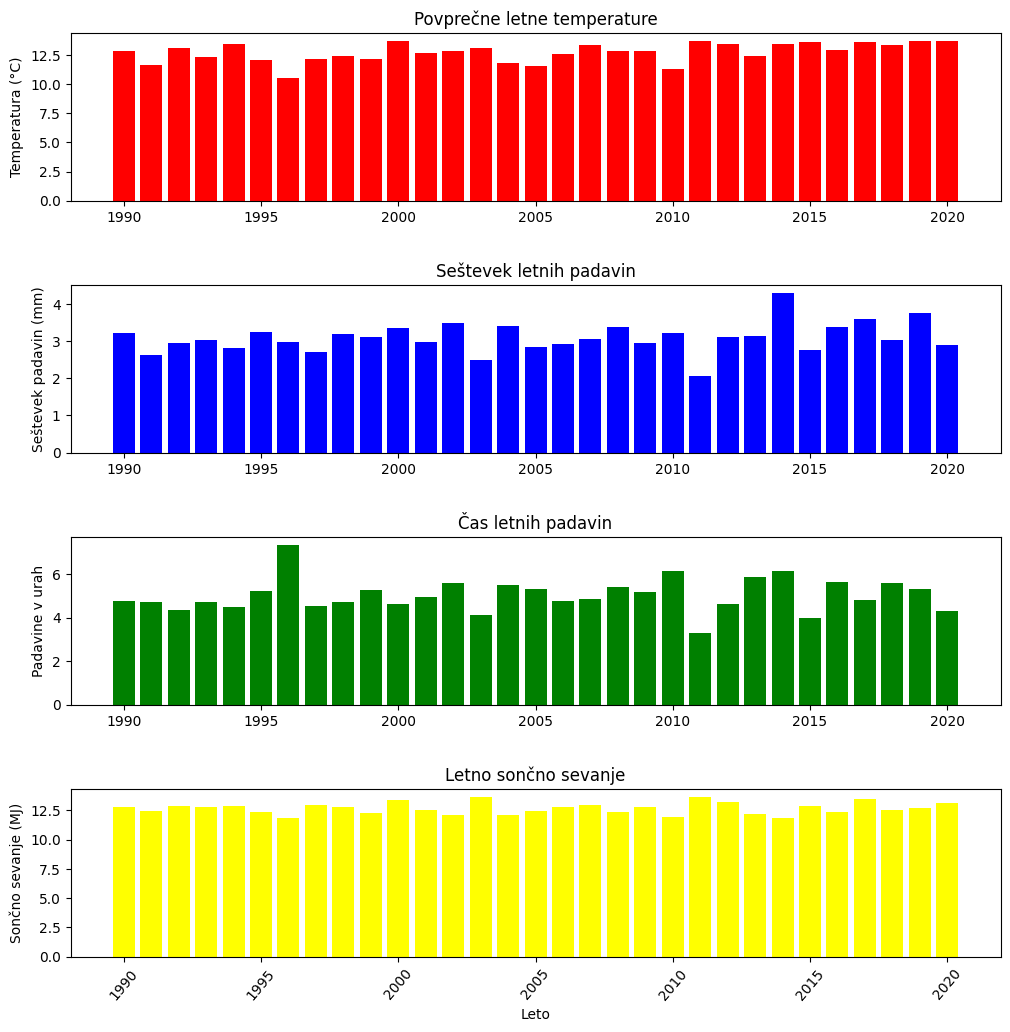

In [13]:
analiza.grafi_letnih_povprecij(letno_povprecje)

Iz podatkov zadnjih 30 let vremenskih razmer v Sloveniji na letni ravni ni mogoče potegniti nobenih konkretnih zaključkov za padavine in sončno sevanje. Vendar lahko opazimo, da se temperature v zadnjih letih počasi zvišujejo. 

Sledi prikaz povprečnih mesečnih temperatur skozi vsa leta.

In [14]:
meseci_leta = analiza.groupiranje_meseci_leto(df)
meseci_leta

,mesec,leto,temperatura,dež_sum,dež_ure,radijacija
0,1,1990,3.612903,1.103226,2.354839,5.520323
1,1,1991,2.416129,1.016129,2.935484,4.686452
2,1,1992,2.970968,0.296774,2.645161,4.434839
3,1,1993,3.190323,0.074194,1.935484,4.925806
4,1,1994,5.158065,1.361290,4.064516,5.216129
...,...,...,...,...,...,...
367,12,2016,3.193548,0.051613,0.387097,4.976452
368,12,2017,3.596774,3.554839,6.903226,4.318065
369,12,2018,3.925806,0.829032,2.870968,4.158065
370,12,2019,5.200000,3.077419,4.161290,3.947419


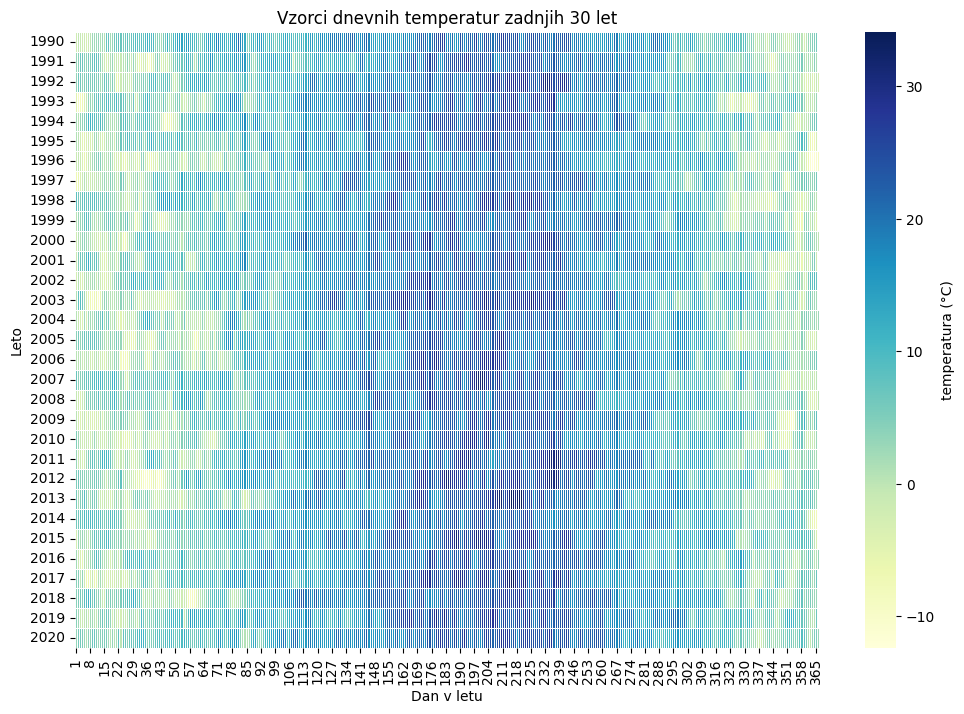

In [17]:
analiza.heatmap_temperatura(df)

Na podoben način tudi sončno sevanje skozi vsa leta.

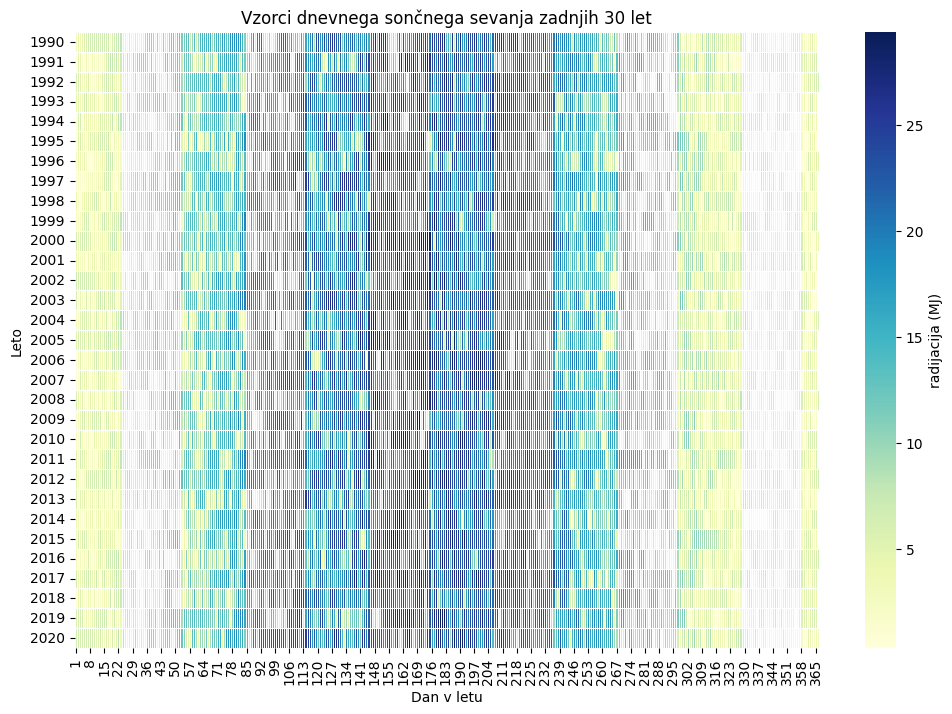

In [18]:
analiza.heatmap_radijacija(df)